In [43]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [44]:
coffee = pd.read_csv('coffee.csv', header = 0, index_col = 0, parse_dates = True, squeeze = True)

In [45]:
coffee.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2000-01-03,122.25,124.00,116.10,116.50,6640,USD
2000-01-04,116.25,120.50,115.75,116.25,5492,USD
2000-01-05,115.00,121.00,115.00,118.60,6165,USD
2000-01-06,119.00,121.40,116.50,116.85,5094,USD
2000-01-07,117.25,117.75,113.80,114.15,6855,USD


In [46]:
coffee.shape

(5683, 6)

In [47]:
ts_coffee = pd.read_csv('coffee.csv', header = 0, index_col = 0, parse_dates = True)

In [48]:
ts_coffee.head()

,Open,High,Low,Close,Volume,Currency
Date,,,,,,
2000-01-03,122.25,124.00,116.10,116.50,6640,USD
2000-01-04,116.25,120.50,115.75,116.25,5492,USD
2000-01-05,115.00,121.00,115.00,118.60,6165,USD
2000-01-06,119.00,121.40,116.50,116.85,5094,USD
2000-01-07,117.25,117.75,113.80,114.15,6855,USD


In [49]:
ts_coffee.shape

(5683, 6)

In [50]:
drop_columns = ['High','Low', 'Close', 'Volume', 'Currency']

In [51]:
ts_coffee=ts_coffee.drop(drop_columns,axis=1)

In [52]:
ts_coffee.head()

,Open
Date,
2000-01-03,122.25
2000-01-04,116.25
2000-01-05,115.00
2000-01-06,119.00
2000-01-07,117.25


In [53]:
ts_coffee['Open']['2000-01']

Date
2000-01-03    122.25
2000-01-04    116.25
2000-01-05    115.00
2000-01-06    119.00
2000-01-07    117.25
2000-01-10    123.50
2000-01-11    115.50
2000-01-12    117.80
2000-01-13    119.25
2000-01-14    117.75
2000-01-18    111.75
2000-01-19    116.50
2000-01-20    118.25
2000-01-21    112.00
2000-01-24    110.95
2000-01-25    111.60
2000-01-26    112.50
2000-01-27    114.75
2000-01-28    115.10
2000-01-31    113.75
Name: Open, dtype: float64

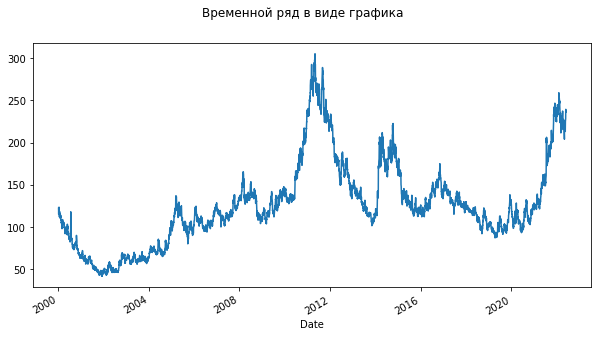

In [54]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд в виде графика')
ts_coffee.plot(ax=ax, legend=False)
pyplot.show()


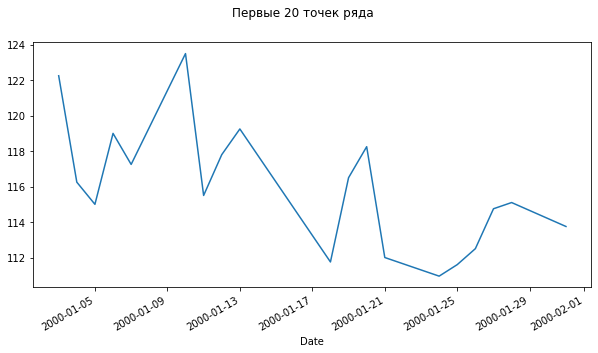

In [55]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Первые 20 точек ряда')
ts_coffee[:20].plot(ax=ax, legend=False)
pyplot.show()

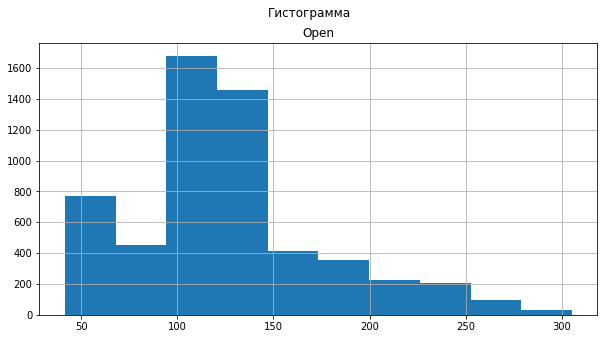

In [56]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Гистограмма')
ts_coffee.hist(ax=ax, legend=False)
pyplot.show()

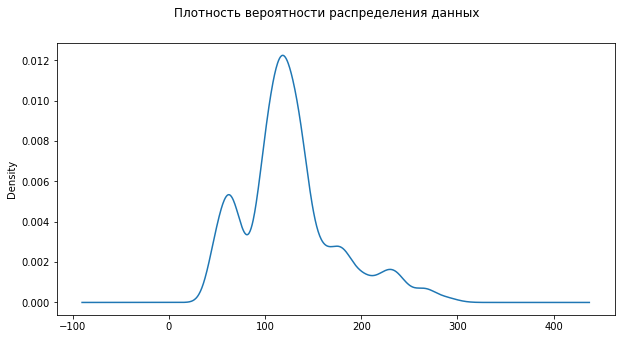

In [57]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Плотность вероятности распределения данных')
ts_coffee.plot(ax=ax, kind='kde', legend=False)
pyplot.show()

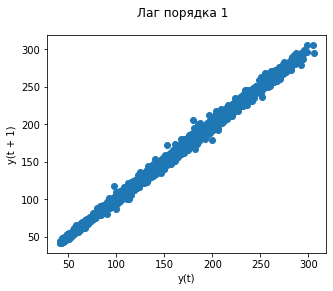

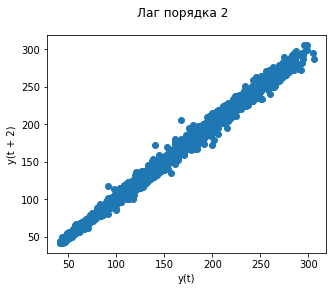

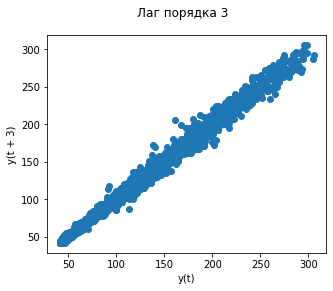

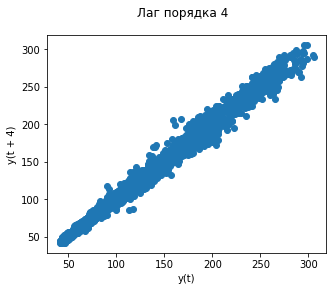

In [58]:
for i in range(1, 5):
    fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(5,4))
    fig.suptitle(f'Лаг порядка {i}')
    pd.plotting.lag_plot(ts_coffee, lag=i, ax=ax)
    pyplot.show()

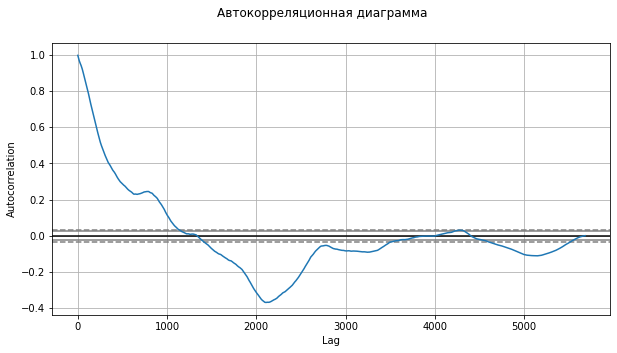

In [59]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Автокорреляционная диаграмма')
pd.plotting.autocorrelation_plot(ts_coffee, ax=ax)
pyplot.show()

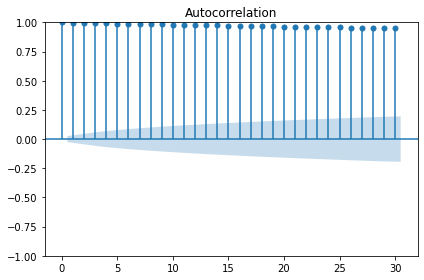

In [61]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(ts_coffee, lags=30)
plt.tight_layout()

In [76]:
ts_coffee2 = ts_coffee.copy()

In [77]:
ts_coffee2['SMA_10'] = ts_coffee2['Open'].rolling(10, min_periods=1).mean()
ts_coffee2['SMA_20'] = ts_coffee2['Open'].rolling(20, min_periods=1).mean()

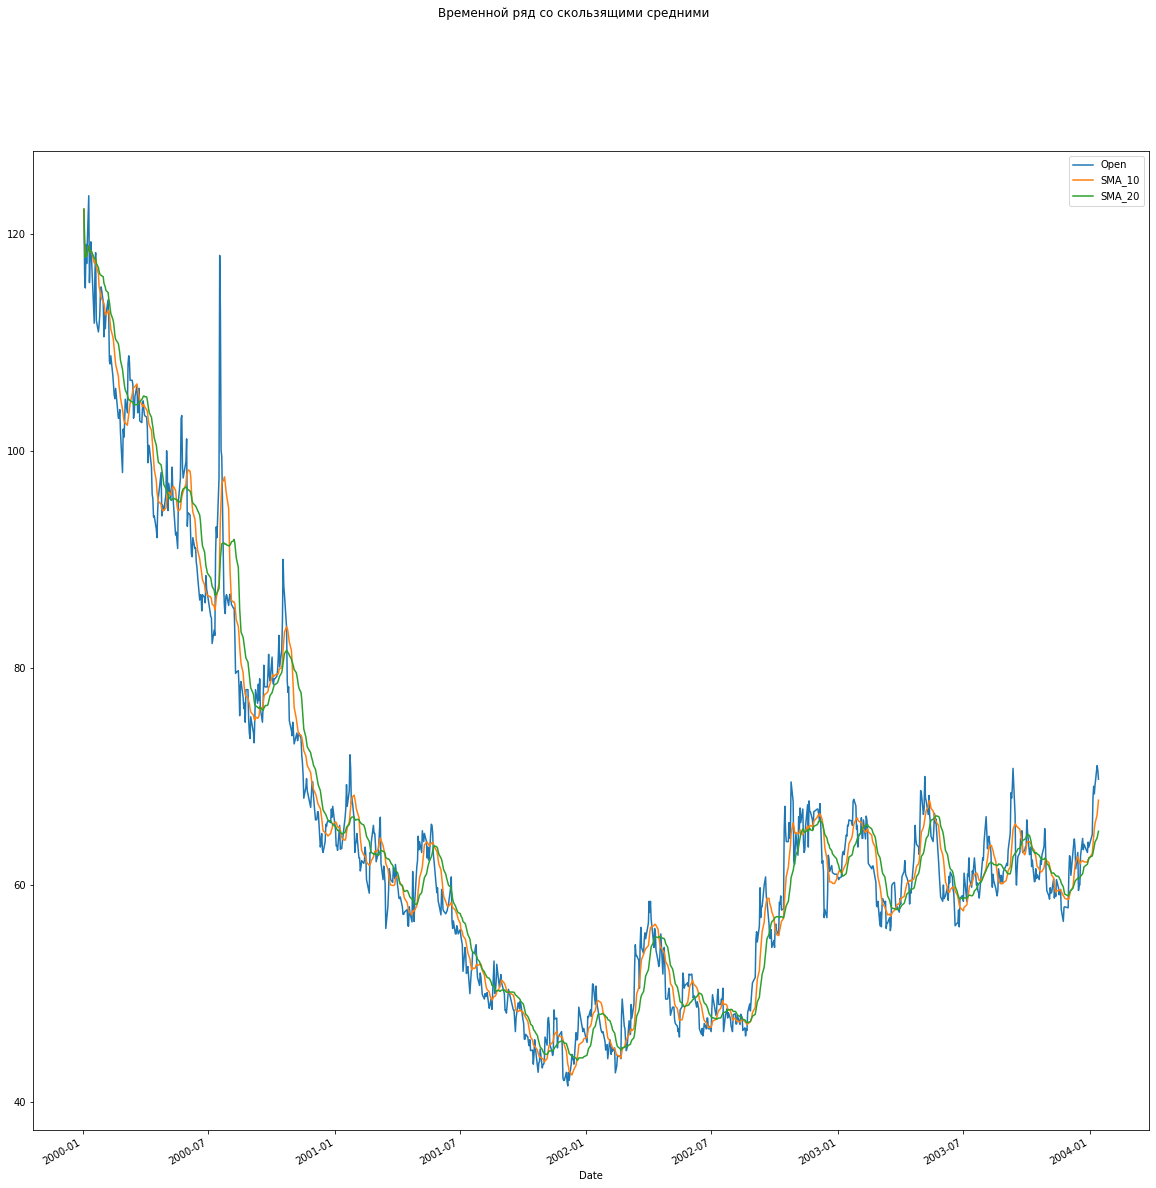

In [82]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(20,20))
fig.suptitle('Временной ряд со скользящими средними')
ts_coffee2[:1000].plot(ax=ax, legend=True)
pyplot.show()

In [83]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [84]:
xnum = list(range(ts_coffee2.shape[0]))
# Разделение выборки на обучающую и тестовую
Y = ts_coffee2['Open'].values
train_size = int(len(Y) * 0.7)
xnum_train, xnum_test = xnum[0:train_size], xnum[train_size:]
train, test = Y[0:train_size], Y[train_size:]
history_arima = [x for x in train]
history_es = [x for x in train]

In [85]:
# Параметры модели (p,d,q) 
arima_order = (6,1,0)
# Формирование предсказаний
predictions_arima = list()
for t in range(len(test)):
    model_arima = ARIMA(history_arima, order=arima_order)
    model_arima_fit = model_arima.fit()
    yhat_arima = model_arima_fit.forecast()[0]
    predictions_arima.append(yhat_arima)
    history_arima.append(test[t])
# Вычисление метрики RMSE
error_arima = mean_squared_error(test, predictions_arima, squared=False)

In [86]:
# Формирование предсказаний
predictions_es = list()
for t in range(len(test)):
    model_es = ExponentialSmoothing(history_es)
    model_es_fit = model_es.fit()
    yhat_es = model_es_fit.forecast()[0]
    predictions_es.append(yhat_es)
    history_es.append(test[t])
# Вычисление метрики RMSE
error_es = mean_squared_error(test, predictions_es, squared=False)

In [87]:
np.mean(Y), error_arima, error_es

(126.20606545838467, 2.772484753663894, 2.7684518794710455)

In [88]:
ts_coffee2['predictions_ARIMA'] = (train_size * [np.NAN]) + list(predictions_arima)
ts_coffee2['predictions_HWES'] = (train_size * [np.NAN]) + list(predictions_es)

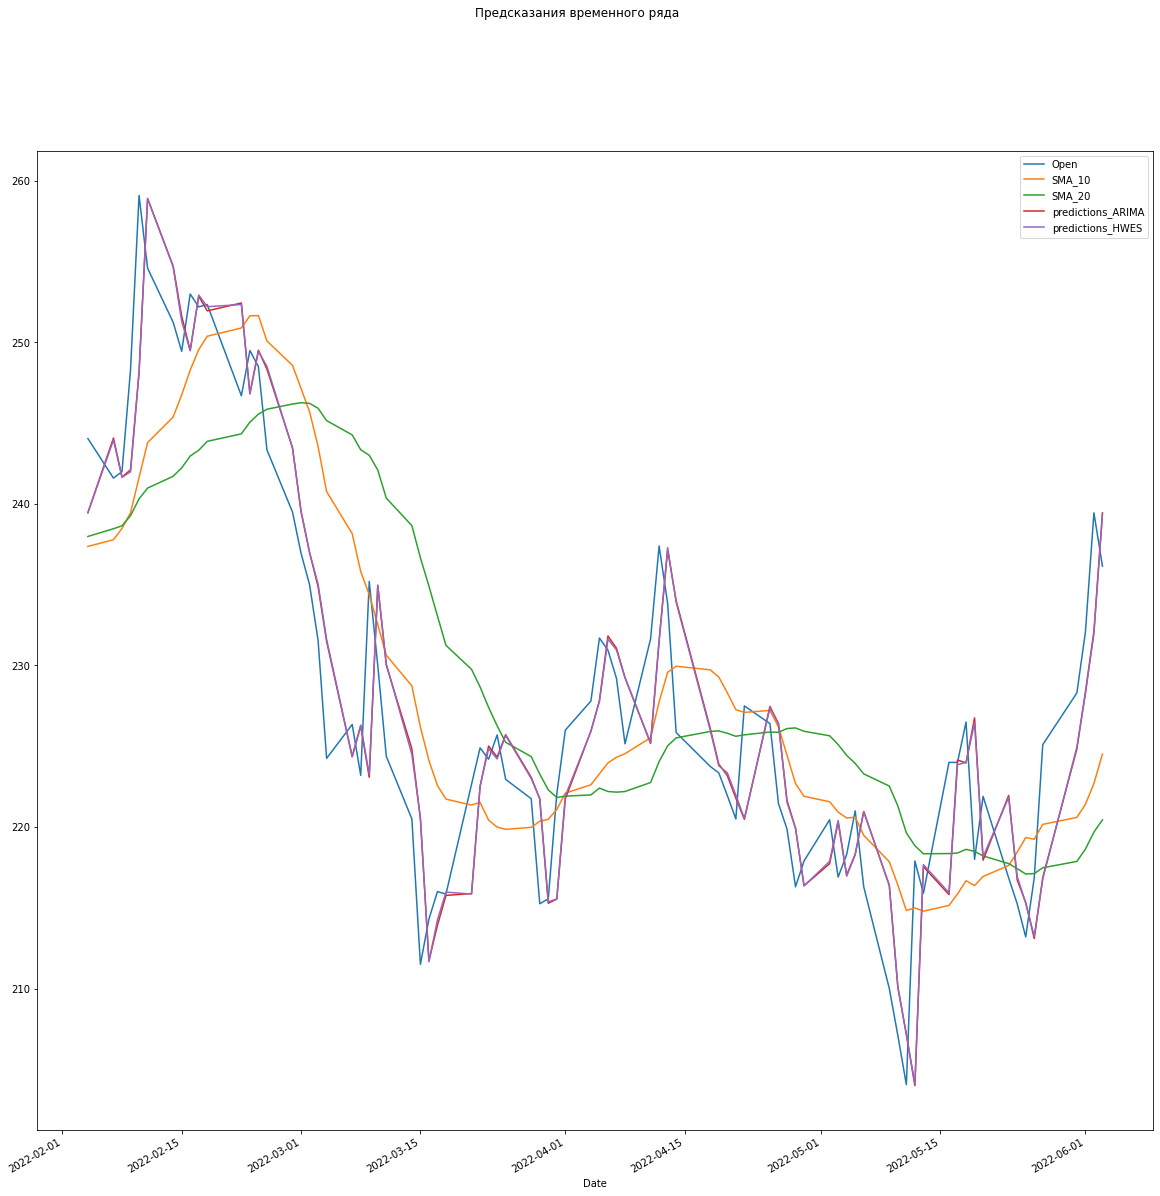

In [95]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(20,20))
fig.suptitle('Предсказания временного ряда')
ts_coffee2[5600:].plot(ax=ax, legend=True)
pyplot.show()

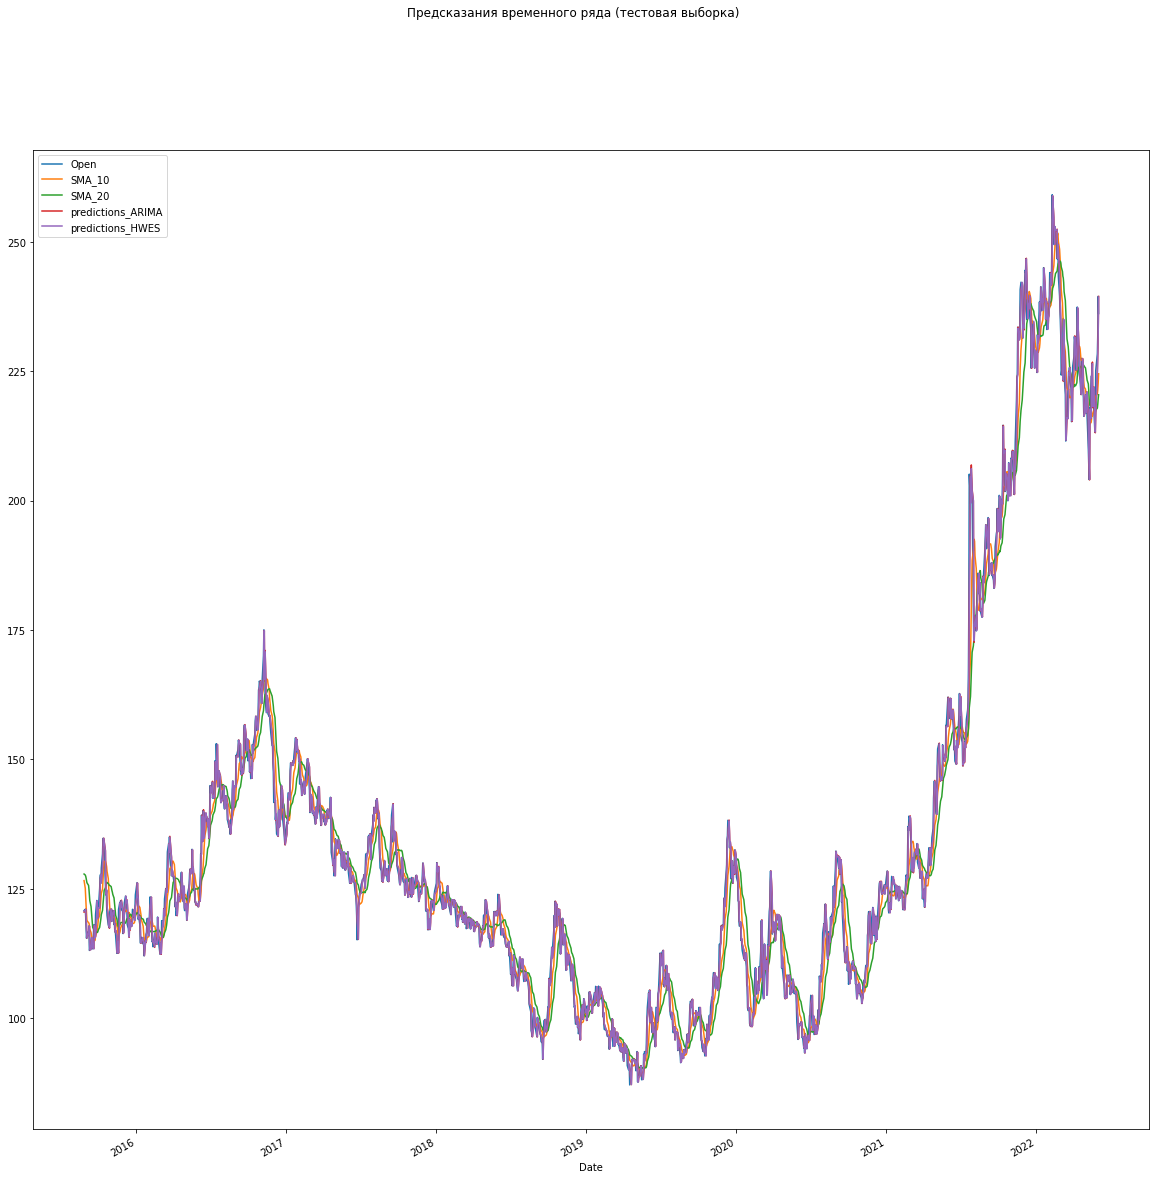

In [97]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(20,20))
fig.suptitle('Предсказания временного ряда (тестовая выборка)')
ts_coffee2[train_size:].plot(ax=ax, legend=True)
pyplot.show()

In [99]:
from gplearn.genetic import SymbolicRegressor


In [101]:
function_set = ['add', 'sub', 'mul', 'div', 'sin']
est_gp = SymbolicRegressor(population_size=500, metric='mse',
                               generations=70, stopping_criteria=0.01,
                               init_depth=(4, 10), verbose=1, function_set=function_set,
                               const_range=(-100, 100), random_state=0)

In [102]:
est_gp.fit(np.array(xnum_train).reshape(-1, 1), train.reshape(-1, 1))


    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0   263.65      1.83344e+82       26          7096.47              N/A      3.87m
   1   143.20      4.52488e+18       37          6423.63              N/A      1.97m
   2   125.76      3.17714e+28       36          2981.26              N/A      1.68m
   3    37.19      1.00884e+15       35          1357.48              N/A     46.25s
   4    33.24      3.00561e+11       36          1348.53              N/A     43.14s
   5    36.24       3.6604e+12       29          1347.86              N/A     42.24s
   6    33.99      5.00527e+11       53          1340.74              N/A     49.27s
   7    32.79      1.00247e+11       32          1337.52              N/A     38.62s
   8    39.85      3.02114e+13       67          1333.78              N/A  

SymbolicRegressor(const_range=(-100, 100),
                  function_set=['add', 'sub', 'mul', 'div', 'sin'],
                  generations=70, init_depth=(4, 10), metric='mse',
                  population_size=500, random_state=0, stopping_criteria=0.01,
                  verbose=1)

In [103]:
print(est_gp._program)

add(sub(sub(div(X0, 28.307), div(sub(div(add(div(div(mul(X0, X0), sub(37.158, -19.620)), add(sin(-38.730), add(sin(-38.730), sub(X0, X0)))), sin(-38.730)), div(X0, 28.307)), sub(37.158, -19.620)), X0)), sub(add(sin(-38.730), add(sin(-38.730), sub(X0, X0))), sub(37.158, -19.620))), div(sub(mul(X0, -11.576), sub(X0, X0)), add(div(div(mul(X0, X0), add(sub(sub(sub(sub(sub(div(X0, 28.307), div(X0, X0)), sub(div(X0, X0), sub(37.158, -19.620))), -19.620), -19.620), -19.620), div(add(div(div(mul(X0, X0), add(sub(sub(div(X0, 28.307), div(X0, X0)), sub(div(X0, X0), sub(37.158, -19.620))), div(sub(mul(X0, -11.576), sub(37.158, -19.620)), add(div(div(mul(X0, X0), add(sub(37.158, -19.620), div(add(div(div(mul(X0, X0), add(37.158, sub(div(X0, 28.307), sub(X0, X0)))), add(sin(-38.730), add(sin(-38.730), sub(X0, X0)))), sub(sub(37.158, -19.620), -19.620)), div(X0, 28.307)))), add(-19.620, add(sin(-38.730), sub(X0, X0)))), div(sub(sin(div(sub(div(X0, X0), sub(37.158, -19.620)), X0)), sub(37.158, add(di

In [106]:
y_gp = est_gp.predict(np.array(xnum_test).reshape(-1, 1))
y_gp[:10]

array([197.02008255, 197.05604924, 197.09201562, 197.1279817 ,
       197.16394748, 197.19991296, 197.23587813, 197.271843  ,
       197.30780756, 197.34377183])

In [107]:
ts_coffee2['predictions_GPLEARN'] = (train_size * [np.NAN]) + list(y_gp)

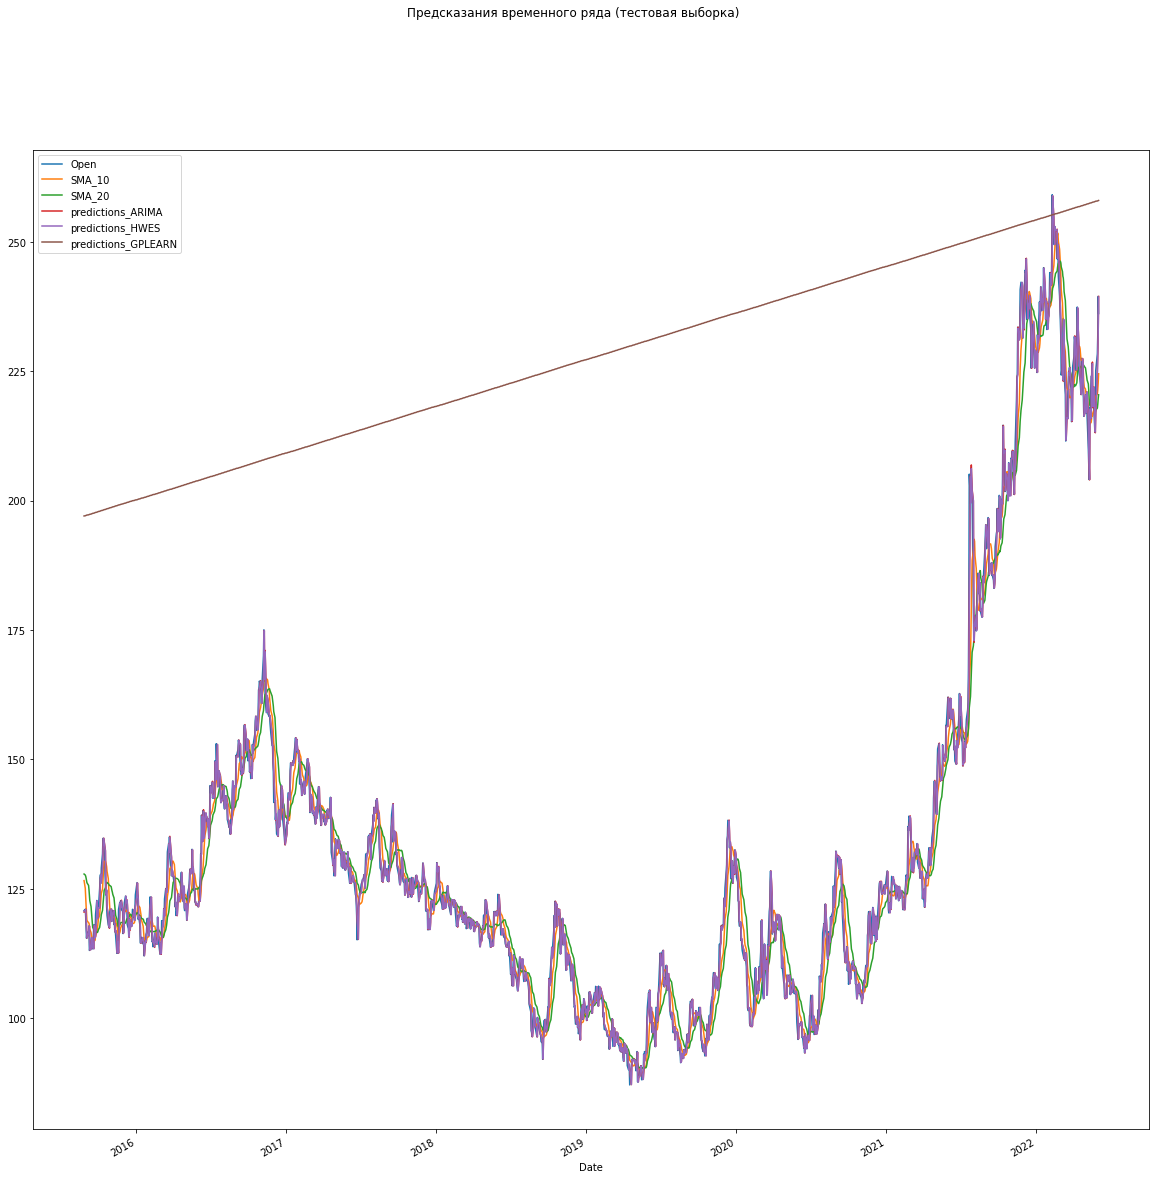

In [109]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(20,20))
fig.suptitle('Предсказания временного ряда (тестовая выборка)')
ts_coffee2[train_size:].plot(ax=ax, legend=True)
pyplot.show()